We will compute the DFT

$$ X(m) = \sum_{n=0}^{N-1} x(n)e^{-j2\pi nm/N}$$

Where:
* m is the discrete frequency variable
* n is the discrete time variable
* N is the total number of samples

Now we will implement it using Euler's identity

$$ X(m) = \sum_{n=0}^{N-1}x(n)\left[cos(2\pi nm/N) -jsin(2\pi nm/N)\right] $$

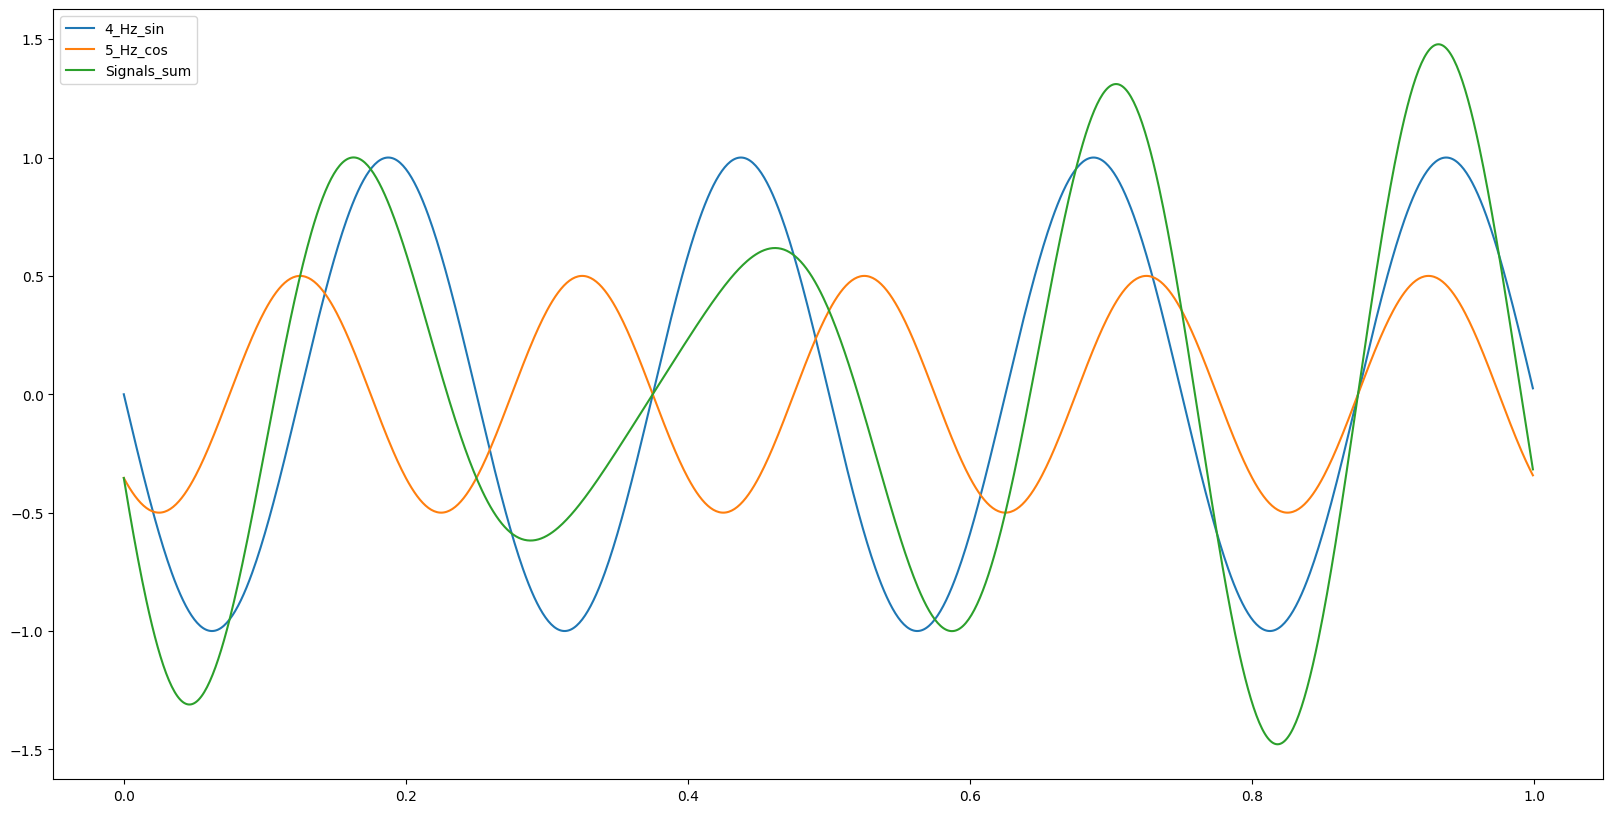

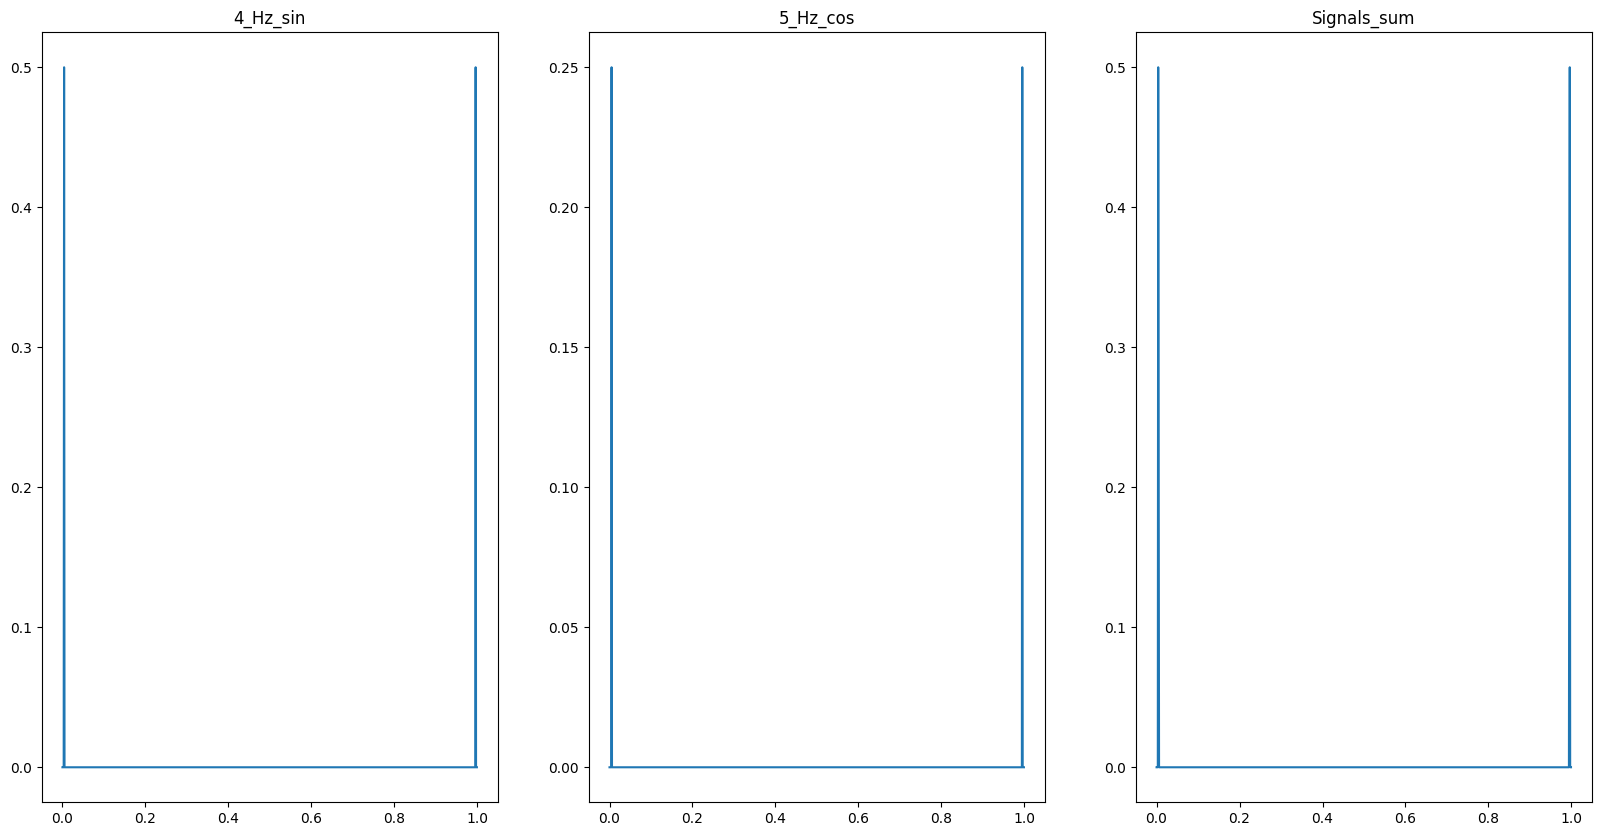

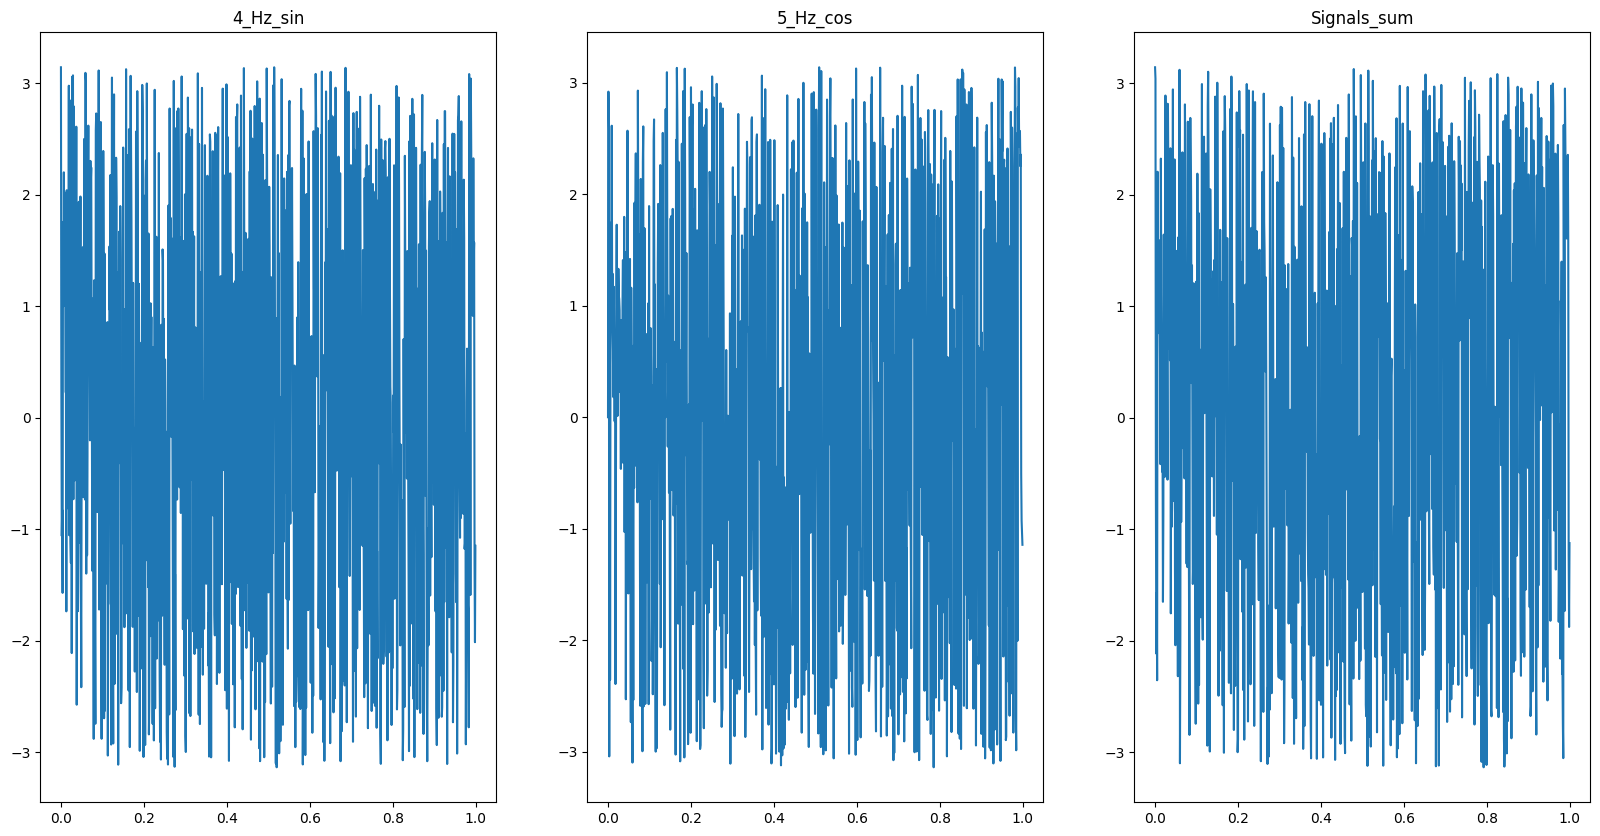

In [1]:
import numpy as np
np.set_printoptions(precision=4)
from numpy import pi,sin,cos
import matplotlib.pyplot as plt


class Sinusoidals:
    def __init__(self, fs = 1000, total_time = 1, compute_sum = True, **kwargs):
        
        '''
        	kwargs : Dictionary  with sinusoidal parameters, (A, freq, phi, sin or cos)
        '''
        self.fs = fs
        self.total_time = total_time
        self.signals = kwargs
   
        self.ts = 1/fs
        self.total_samples = fs * total_time
        self.N = np.arange(self.total_samples)

        self.compute_sum = compute_sum
        self.sinusoidals = {}
        self.dft = {}
        
        self.gen_sinusoidals()
        self.gen_DFT();
        
	
    def __call__(self):
        self.plot_signals()
        self.plot_DFT()

    def gen_sinusoidals(self):
        if self.signals:
            function = {'sin':sin, 'cos':cos}
            total_signals = len(self.signals)
            for A, freq, phi, sinu in self.signals.values():
                self.sinusoidals[str(freq)+'_Hz_'+sinu] = A*function[sinu](2*pi*freq*self.ts*self.N + phi)            

                
            if self.compute_sum:
                self.sinusoidals['Signals_sum'] = sum(self.sinusoidals.values())
            
            return self.sinusoidals
        
        else:
            print("There are no signals to generate.")
    
    def plot_signals(self):
        if self.signals:
            total_sinusoidals = len(self.sinusoidals)
            _, ax = plt.subplots(figsize = (20,10))
            for key, value in self.sinusoidals.items():
                ax.plot(self.N*self.ts, value, '-', label = key)
            
            ax.legend()
            plt.show()
                
            
        else:
            print("There are no signals to plot.")
    
    def gen_DFT(self):
        ''' 
        	Magnitude and phase of all sinusoidals 
        '''
        arg = 2*pi*self.N/self.total_samples
        
        for key, value in self.sinusoidals.items():
            Xm = np.array([
                sum(value*(cos(m*arg) + 1j*sin(m*arg))) 
                for m in range(self.total_samples)])
            
            amp = np.sqrt(np.real(Xm)**2+np.imag(Xm)**2)/self.total_samples
            phase = np.arctan2(np.imag(Xm), np.real(Xm))
            
            self.dft[key] = {"amp": amp, "phase": phase}
   
        return self.dft
    
    def plot_DFT(self):
        if self.signals:
            total_sinusoidals = len(self.sinusoidals)
            
            rs = int((total_sinusoidals-1)/3+1)
            
            _, ax = plt.subplots(rs, 3, figsize=(20, 10))
            for i, (key, value) in enumerate(self.dft.items()):
                ax[i].plot(self.N*self.ts, value["amp"], '-', label=key)
                ax[i].set_title(key)
            
            _, ax = plt.subplots(rs, 3, figsize=(20, 10))
            for i, (key, value) in enumerate(self.dft.items()):
                ax[i].plot(self.N*self.ts, value["phase"], '-', label=key)
                ax[i].set_title(key)

            plt.show()

    
signal_1 = Sinusoidals(
    **{'y1': (1, 4, pi, 'sin'), 'y2': (0.5, 5, 3/4*pi, 'cos')})

signal_1()

    